# Anomaly Detection (w/ Network Detection dataset) using tinyML

#### Dataset Source: https://www.kaggle.com/anushonkar/network-anamoly-detection?select=Train.txt

#### Already preprocessed CSV version of the above dataset can be found at https://www.kaggle.com/datasets/deepthisudharsan/network-anomaly-dataset

#### In this project we will be classifying the Network data as normal (encoded as label 1) or attack (encoded as label 0) by training a tensorflow model, and then loading the model in a microcontroller and observing the accuracy of classification in the serial monitor. 

****
### A glimpse of the dataset

**duration**|**protocoltype**|**service**|**flag**|**srcbytes**|**dstbytes**|**land**|**wrongfragment**|**urgent**|**hot**|**numfailedlogins**|**loggedin**|**numcompromised**|**rootshell**|**suattempted**|**numroot**|**numfilecreations**|**numshells**|**numaccessfiles**|**numoutboundcmds**|**ishostlogin**|**isguestlogin**|**count**|**srvcount**|**serrorrate**|**srvserrorrate**|**rerrorrate**|**srvrerrorrate**|**samesrvrate**|**diffsrvrate**|**srvdiffhostrate**|**dsthostcount**|**dsthostsrvcount**|**dsthostsamesrvrate**|**dsthostdiffsrvrate**|**dsthostsamesrcportrate**|**dsthostsrvdiffhostrate**|**dsthostserrorrate**|**dsthostsrvserrorrate**|**dsthostrerrorrate**|**dsthostsrvrerrorrate**|**attack**|**lastflag**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
0|tcp|ftp_data|SF|491|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|2|0|0|0|0|1|0|0|150|25|0.17|0.03|0.17|0|0|0|0.05|0|normal|20
0|udp|other|SF|146|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|13|1|0|0|0|0|0.08|0.15|0|255|1|0|0.6|0.88|0|0|0|0|0|normal|15

## IMPORTING LIBRARIES AND READING THE DATA

In [1]:
# IMPORTING LIBRARIES 
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

In [2]:
# Reading the data and making it into a meaningful dataframe
data = pd.read_csv("Network_anomaly_data.txt",sep=",",names=["duration","protocoltype","service",
"flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised",
"rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate","rerrorrate","srvrerrorrate","samesrvrate", 
"diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate",
"dsthostsamesrcportrate","dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate","dsthostrerrorrate",
"dsthostsrvrerrorrate","attack", "lastflag"])

In [3]:
data # printing the dataframe

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


## DATA PREPROCESSING AND GETTING THE TEST AND TRAIN DATA

In [4]:
# We are dropping certain features that we feel arent required for our process
data.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [5]:
# Since normal datas are labelled as "normal" but attacks are given by the attack type which we aren't concerned 
# about as of now as we need to know if it is an attack or not so all the labels apart from normal we are changing it to 
# "attack"
data['attack'].loc[data['attack']!='normal']='attack'
data

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,attack,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,1,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,20


In [6]:
# label encoding non-numerical attributes
le=LabelEncoder()
data['protocoltype'] = le.fit_transform(data['protocoltype'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])
data['attack'] = le.fit_transform(data['attack'])
pd.DataFrame(data)

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21
4,0,1,24,9,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1,21
125970,0,1,54,9,2231,384,0,0,1,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,20


In [7]:
# All the features apart from Attack are what we are going to use to predict the attack status of the data
# attack = 1 (normal/not an attack) and attack = 0 (attack)
X = data.drop(['attack'],axis=1).to_numpy()
Y = data['attack'].to_numpy()
# Splitting X and y testing and training data
# we are taking 20% of the data for testing and 80% of the data for training 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
# reshaping y test and train array
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
# Getting input and output layer dimensions
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

## TESTING AND TRAINING OUR NEURAL NETWORK MODEL 

In [8]:
# function definition for a basic NN (neural network)
def dnn_model(X_train,X_test,y_train,y_test):
    
    #Defining a sequential model with 3 layers
    model = tf.keras.models.Sequential([
    Dense(units = 16, input_shape =(input_dim,),activation = 'relu'),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')])
    # Compiling the NN with adam optimizer and sparse_categorical_crossentropy loss
    model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])
    # Fitting the training data 
    model.fit(X_train,y_train, epochs = 10,batch_size=32)
    # Predicting 
    prediction = model.predict(X_test,verbose = 0)
    # since our predictions here will be probabilites, the class with the maximum probability 
    # will be the prediction     
    y_pred = np.argmax(prediction,axis = -1)
    # Confusion matrix heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, fmt="d")
    # The top and bottom of heatmap gets trimmed off so to prevent that we set ylim
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title("Confusion matrix")
    plt.show()
    pred = y_pred.astype(int)
    print("ACCURACY :",accuracy_score(y_test,pred))
     # model accuracy

Epoch 1/10
3150/3150 [==============================] - 4s 1ms/step - loss: 842.7705 - accuracy: 0.8607: 1s - loss: 591.0609 -  - ETA: 0s - loss: 721.1924 - accuracy: 0.85 - ETA: 0s - loss: 732.3613 -  - ETA: 0s - loss: 807.9426 - 
Epoch 2/10
3150/3150 [==============================] - 4s 1ms/step - loss: 2328.7189 - accuracy: 0.9108
Epoch 3/10
3150/3150 [==============================] - 4s 1ms/step - loss: 630.0340 - accuracy: 0.9424: 2s - loss: 675.7610 - ac - ETA: 1s - loss: 576 - ETA: 1s - loss: 551 - ETA: 0s - los
Epoch 4/10
3150/3150 [==============================] - 4s 1ms/step - loss: 1212.8115 - accuracy: 0.9262
Epoch 5/10
3150/3150 [==============================] - 4s 1ms/step - loss: 101.6134 - accuracy: 0.9413: 1s - loss:
Epoch 6/10
3150/3150 [==============================] - 4s 1ms/step - loss: 945.3360 - accuracy: 0.8702
Epoch 7/10
3150/3150 [==============================] - 4s 1ms/step - loss: 951.2812 - accuracy: 0.8962
Epoch 8/10
3150/3150 [======================

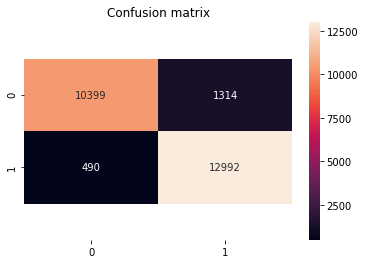

ACCURACY : 0.9283984917642389


In [9]:
#calling the basic NN model for our testing and training data 
dnn_model(X_train,X_test,y_train,y_test)

## REFERENCE PROJECT

###  https://github.com/DeepthiSudharsan/Anomaly-Detection-using-TinyML

## Quick Start Guide

### https://github.com/DeepthiSudharsan/MLSA-Tutorial